![Astrofisica Computacional](../logo.PNG)

---
## 01. Ecuaciones de Poisson y Laplace

Eduard Larrañaga (ealarranaga@unal.edu.co)

---


### Resumen

Se presenta el método de solución de la ecuación de Poisson o Laplace con los métodos de diferencias finitas y algunos de los métodos de relajación.


---

---

## PDEs Elípticas. La Ecuación de Poisson

Una de las Ecuaciones Diferenciales Parciales elípticas maá utilizada en la astrofísica es la **ecuación de Poisson**, la cual describe la gravedad Newtoniana y también la electrostática,

\begin{equation}
\nabla^2 \phi = \rho \,\,.
\end{equation}

En esta ecuación $\phi = \phi(x,y,z)$ es la función que se quiere encontrar (puede representar el potencial gravitacional o el potencial electrostático) y $\rho = \rho(x,y,z)$ es una función escalar de la posición. Los problemas elípticos pueden ser lineales ($\rho$ no depende de $\phi$ o sus derivadas) o no-lineales ($\rho$ depende de $\phi$ o de sus derivadas). Cuando $\rho=0$, la ecuación de Poisson se denomina **ecuación de Laplace**.

$\nabla^2$ representa el operador diferencial de Laplace,

\begin{equation}
\nabla^2 = \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} + \frac{\partial^2}{\partial z^2}
\end{equation}



---

## Método de Diferencias Finitas en 2-dimensiones

Una técnica fundamental para resolver este tipo de ecuaciones diferenciales son las diferencias finitas. Para ilustrarlo, consideraremos un problema de valor de frontera en dos dimensiones. Así la ecuación diferencial tomará la forma


\begin{equation}
\nabla^2 \phi = \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2}  = \rho (x,y).
\end{equation}

Como ya se ha discutido, en el método de diferencias finitas se divide el espacio en una malla discreta. En este caso utilziaremos una malla rectangular de coordenadas cartesianas en cuya frontera se conoce el valor de la función $\phi$ (condiciones de frontera) y en cuyo interior se quiere encontrar la solución. En este caso, supondremos que la region bidimensional que se trabajara es un rectangulo que se dividira utilizando $M+1$ nodos en la dirección-x y $N+1$ nodos en la dirección-y, para un total de $(M+1) \times (N+1)$ nodos en total. De esta forma, los valores discretos de la coordenada x se denotarán como $x_i$ con $i=0,1,2,...,M$ mientras que los valores discretos de la coordenada y se denotarán como $y_j$ con $j=0,1,2,...,N$. El valor de la función $\phi$ en el punto $(x_i,y_j)$ se denotará como $\phi(x_i, y_j) = \phi_{i,j}$

Supondremos también que las condiciones de frontera serán:

- $\phi(x_0,y_j) = \phi_{0j} = A_{j}$
- $\phi(x_M,y_j) = \phi_{Mj} = B_{j}$
- $\phi(x_i,y_0) = \phi_{i0} = C_{i}$
- $\phi(x_i,y_N) = \phi_{iN} = D_{i}$


Luego de definir la malla de discretización, el siguiente paso es discretizar los operadores diferenciales. En este caso, se trabajará con las segundas derivadas aproximadas como diferencias centradas,

\begin{align}
\frac{\partial^2}{\partial x^2} = &\frac{\phi(x+h,y) - 2\phi(x,y) + \phi(x-h,y)}{h^2}\\
\frac{\partial^2}{\partial y^2} = &\frac{\phi(x,y+h) - 2\phi(x,y) + \phi(x,y-h)}{h^2},
\end{align}

donde se ha utilizado el mismo tamaño de la malla $h$ en las dos direcciones. De esta forma, el operador Laplaciano aplicado a la función $\phi$ en la ecuación se convierte en

\begin{align}
\nabla^2 \phi = \frac{\phi(x+h,y) - 2\phi(x,y) + \phi(x-h,y)}{h^2} + \frac{\phi(x,y+h) - 2\phi(x,y) + \phi(x,y-h)}{h^2} = &\rho (x,y)\\
\frac{\phi(x+h,y) - 2\phi(x,y) + \phi(x-h,y) + \phi(x,y+h) - 2\phi(x,y) + \phi(x,y-h)}{h^2} = &\rho (x,y)\\
\phi(x+h,y)  + \phi(x-h,y) + \phi(x,y+h)  + \phi(x,y-h) - 4\phi(x,y) = & h^2 \rho (x,y)
\end{align}

La información que presenta el lado izquierdo de esta ecuación se puede entender notando que se suman los valores de la ufunción $\phi$ en los cuatro nodos inmediatamente adyacentes a $(x,y)$ y se resta 4 veces el valor en $(x,y)$. Esto se suele representar gráficamente como un "stencil" o patrón en la forma

<img src="https://i.ibb.co/NsTP2Wv/Screen-Shot-2022-01-01-at-8-56-51-PM.png" width=450>


Este patrón determina la ecuación iterativa de diferencias finitas resultante:

\begin{equation}
\phi(x_{i+1},y_i)  + \phi(x_{i-1},y_i) + \phi(x_i,y_{i+1})  + \phi(x_i,y_{i-1}) - 4\phi(x_i,y_i) =  h^2 \rho (x_i,y_i)
\end{equation}

A su vez esta relación podrá ser escrita como un conjunto de ecuaciones algebraicas lineales acopladas con la forma

\begin{equation}
\mathcal{M} \Phi = R
\end{equation}

donde se ha construido el vectore $((M+1)+(N+1))$ dimensional

\begin{equation}
\Phi = 
\begin{pmatrix}
\phi_{0,0}\\ \phi_{1,0} \\ \phi_{2,0}\\ \vdots \\ \phi_{M,0} \\ \phi_{0,1}\\ \vdots \\ \phi_{M,1}\\ \vdots \\ \vdots \\ \phi_{0,N}\\ \vdots \\ \phi_{M,N}
\end{pmatrix}
\end{equation}

---
### Ejemplo 

Para ilustrar la construcción del sistema lineal, considere el siguiente problema simple:

Queremos resolver la ecuación de Poisson en la región $0\leq x \leq 1$, $0\leq y \leq 1$ con $\rho (x,y) = 2y$. Las condiciones de frontera (Dirichlet) serán $\phi(x,0) = 0$, $\phi(0,y) = 0$, $\phi(1,y) = y$ y $\phi(x,1) = x$.

Para solucionar el problema utilizaremos una malla de discretización con $h=\frac{1}{3}$ en ambas direcciones (con este valor tan grande del espacio entre nodos no se obtendrá un resultado mu preciso).
De esta forma, la malla tendrá $4 \times 4$ nodos localizados en las coordenadas 

\begin{align}
x_i = &(x_0, x_1, x_2, x_3) = \left( 0, \frac{1}{3}, \frac{2}{3}, 1 \right)\\
y_i = &(y_0, y_1, y_2, y_3) = \left( 0, \frac{1}{3}, \frac{2}{3}, 1 \right)
\end{align}

y la función $\phi$ se discretizará con 16 valores, $\phi_{0,0}, \phi_{1,0}, \phi_{2,0}, ...$ .

Las condiciones de frontera serán entonces

\begin{align}
\phi_{0,0} = & \phi_{1,0} = \phi_{2,0} = \phi_{3,0} = 0\\
\phi_{0,1} = & \phi_{0,2} = \phi_{0,3} = 0 \\
\phi_{3,1} = &  \frac{1}{3}\\
\phi_{3,2} = &  \frac{2}{3}\\
\phi_{3,3} = & 1 \\
\phi_{1,3} = &  \frac{1}{3}\\
\phi_{2,3} = &  \frac{2}{3}.
\end{align}


se puede observar que los valores independientes impuestos por las condiciones de frontera son 12 y los valores que se quieren encontrar para $\phi$ son solamente 4: $\phi_{1,1}, \phi_{1,2}, \phi_{2,1}, \phi_{2,2}$.

Utilizando el stencil

\begin{equation}
\phi(x_{i+1},y_i)  + \phi(x_{i-1},y_i) + \phi(x_i,y_{i+1})  + \phi(x_i,y_{i-1}) - 4\phi(x_i,y_i) =  h^2 \rho (x_i,y_i)
\end{equation}

se construye el sistema lineal en la forma

\begin{equation}
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 1 & -4 & 1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 1 & -4 & 1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 1 & -4 & 1 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 1 & -4 & 1 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
\end{pmatrix}
\begin{pmatrix}
\phi_{0,0}\\ \phi_{1,0} \\ \phi_{2,0} \\ \phi_{3,0} \\ 
\phi_{0,1}\\ \phi_{1,1} \\ \phi_{2,1} \\ \phi_{3,1} \\
\phi_{0,2}\\ \phi_{1,2} \\ \phi_{2,2} \\ \phi_{3,2} \\
\phi_{0,3}\\ \phi_{1,3} \\ \phi_{2,3} \\ \phi_{3,3} 
\end{pmatrix}=
\begin{pmatrix}
0\\ 0 \\ 0 \\ 0 \\ 
0\\ \frac{2}{27} \\ \frac{2}{27} \\ \frac{1}{3} \\
0\\ \frac{4}{27} \\ \frac{4}{27} \\ \frac{2}{3} \\
0\\ \frac{1}{3} \\ \frac{2}{3} \\ 1 
\end{pmatrix}
\end{equation}

Este sistema puede resolverse manualmente debido a que solo se tienen 4 valores de la función $\phi$ por obtener. Sin embargo, aqui encontraremos la slución utilizando la función [numpy.linalg.solve( )](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html),

In [5]:
import numpy as np

M = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 1,-4, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 1,-4, 1, 0, 0, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, 1,-4, 1, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 1, 0, 0, 1,-4, 1, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
             ])
b = np.array([0, 0, 0, 0, 0, 2/27, 2/27, 1/3, 0, 4/27, 4/27, 2/3, 0, 1/3, 2/3, 1])

In [6]:
phi = np.linalg.solve(M,b)
phi

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.06481481, 0.17592593, 0.33333333, 0.        , 0.15740741,
       0.37962963, 0.66666667, 0.        , 0.33333333, 0.66666667,
       1.        ])

Los valores encontrados para la función $\phi$ son
\begin{align}
\phi_{1,1} = & 0.0648\\ 
\phi_{2,1} = & 0.1759\\ 
\phi_{1,2} = & 0.1574\\
\phi_{2,2} = & 0.3796
\end{align}

Se puede derle una forma matricial a los resultados para visualizar el comportamiento de la función $\phi$ a través de la función [maptplotlib.pyplot.pcolormesh( )](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html),

In [7]:
phi = phi.reshape(4,4)
phi = phi.T
phi

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.06481481, 0.15740741, 0.33333333],
       [0.        , 0.17592593, 0.37962963, 0.66666667],
       [0.        , 0.33333333, 0.66666667, 1.        ]])

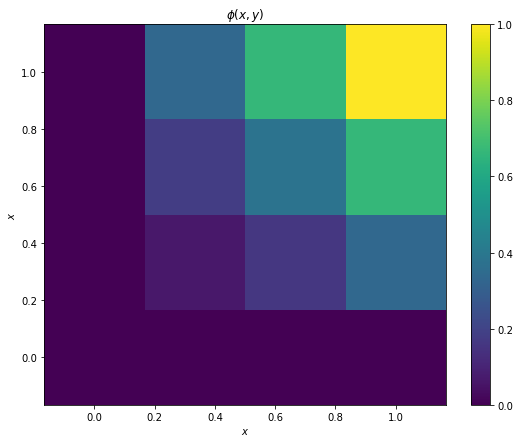

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0,1,4)
y = np.linspace(0,1,4)

# Make the plot with colorbar
plt.figure(figsize=(9,7))
plt.pcolormesh(x, y, phi, shading='auto')
plt.colorbar()
plt.xlabel(r'$x$')
plt.ylabel(r'$x$')
plt.title(r'$\phi(x,y)$')
plt.show()

Aún cuando este método es fácilmente aplicable y rápido en el ejemplo presentado, cuando se trabaja un problema de la vida real, con un número grande de nodos, la solución del sistema de ecuaciones lineales puede necesitar un tiempo de computo muy largo. Si la discretización se realiza con $N$ puntos, la matriz $\phi_{i,j}$ tendrá $N^2$ elementos y el número de operaciones requerido para solucionar el sistema lineal correspondiente sera $\mathcal{O}(N^3)$. En el caso de $N=100$ esto significa un numero de operaciones del orden de $10^6$.

## Métodos de Relajación

Otra clase de algoritmos para la solución de la ecuación de Poisson son los denominados métodos de relajación. En estos, se comienza el proceso con un ansatz inicial que luego se modifica mediante iteraciones para ir acercandose a la solución verdadera.

### Método de Jacobi

Este es el método mas simple de todos y se puede resumir en los siguientes pasos:

1. Se inicializa la matriz $\phi_{i,j}$ con un ansatz inicial
2. Se aplican las condiciones de forntera
3. Para cada punto interior en la malla se calcula la cantidad
\begin{equation}
\phi^*_{i,j} = \frac{1}{4} \left( \phi_{i+1,j} + \phi_{i-1,j} + \phi_{i,j+1} + \phi_{i,j-1} - h^2\rho_{i,j}\right)
\end{equation}

4. Para cada punto interior se reemplaza $\phi_{i,j}$ por $\phi^*_{i,j}$
5. Se vuelve al paso 2 hasta que la diferencia entre las dos aproximaciones mas recientes sea más pequeña que una tolerancia predeterminada.


A pesar de que el método de Jacobi es rápido y fácil de implementar, puede tener una lenta convergencia, especialmente para un gran número de nodos. 

### Método de Gauss-Seidel

Este método es similar al de Jacobi, excepto porque los pasos 3. y 4. descritos arriba se combinan de tal forma que $\phi_{i,j}$ se reemplaza por $\phi^*_{i,j}$ inmediatamente se calcula. Con esta pequeña modificación se logra mejorar el tiempo de calculo y adicionalmente se necesita menos espacio de memoria para almacenar los calculos intermedios.

### Método de Sobre-Relajación Sucesiva ( Succesive Over-Relaxation: SOR)

Otra modificación posible para los métodos anteriores corresponde a cambiar la actualización con la forma

\begin{equation}
\phi^*_{i,j} = (1-\omega) \phi_{i,j} + \frac{1}{4} \omega \left( \phi_{i+1,j} + \phi_{i-1,j} + \phi_{i,j+1} + \phi_{i,j-1} - h^2\rho_{i,j}\right)
\end{equation}

donde $\omega$ es un parametro de relajación. El valor $\omega = 1$ recupera el método de Gauss-Seidel, valores $\omega<1$ produce  *sub-relajación* (i.e. se mantiene una proción de la solución anterior) y un valor $\omega >1$ produce *sobre-relajación* (la nueva solución se mueve lejos de la anterior solución que en el modelo de Gauss-Seidel).

El valor más apropiado para $\omega$ depende del problema particular que se esta resolviendo. Sin embargo, valores en el rango $1.2 \leq \omega \leq 1.4$ suele dar muy buenos resultados. El método SOR requiere de menos iteraciones que los métodos de Jacobi y de Gauss-Seidel y en general se puede considerar como el más practico de todos, aunque es importante recalcar que la convergencia de la solución también depende del ansatz inicial elegido. 
